In [1]:
# AI소프트웨어과_2023143011_유진_공격수_데이터시각화

In [2]:
# Pandas 라이브러리
import pandas as pd

# NumPy (데이터 연산 및 처리)
import numpy as np

# Matplotlib (데이터 시각화)
import matplotlib.pyplot as plt

# Seaborn (고급 데이터 시각화)
import seaborn as sns

In [3]:
# 한글 폰트 설치 및 설정
!apt-get -qq install fonts-nanum
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔고딕 폰트 경로를 명시적으로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())  # 폰트 설정

Selecting previously unselected package fonts-nanum.
(Reading database ... 123633 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# FW_CSV 파일 읽기
FW_file_path = '/content/transfermarket_o34_Forward_top50.csv'  # 파일 경로
data = pd.read_csv(FW_file_path)

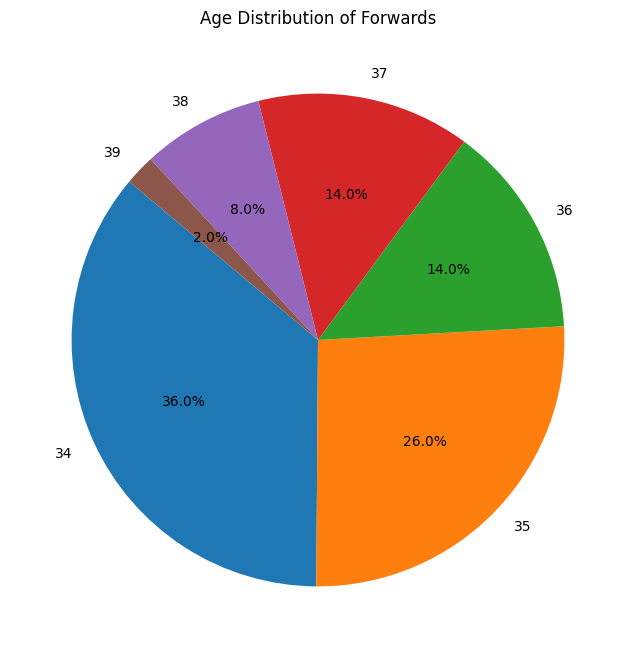

In [8]:
# 연령 분포 데이터 준비
age_distribution = data['Age'].value_counts().sort_index()  # 연령 분포 계산 및 정렬

# 공격수 연령별 분포 원그래프 생성
plt.figure(figsize=(8, 8))
age_distribution.plot.pie(
    autopct='%1.1f%%',  # 퍼센트 표시
    startangle=140,     # 시작 각도
    label='',           # 레이블 제거
    explode=None        # 빈 공간 없음
)
plt.title('Age Distribution of Forwards')  # 그래프 제목
plt.ylabel('')  # Y축 레이블 제거
plt.show()

               Player       Club     Nation  Age Market Value
0        Lionel Messi  Argentina  Argentina   37      €25.00m
1  Robert Lewandowski     Poland     Poland   36      €15.00m
2   Cristiano Ronaldo   Portugal   Portugal   39      €15.00m
3       Karim Benzema     France     France   36      €10.00m
4       Thomas Müller    Germany    Germany   35       €8.00m
Nation
Spain                   5
France                  4
Argentina               3
Bosnia-Herzegovina      3
Uruguay                 2
Nigeria                 2
Peru                    2
Russia                  2
Brazil                  2
Algeria                 2
Belgium                 2
England                 2
Serbia                  1
Iceland                 1
Mexico                  1
United Arab Emirates    1
Portugal                1
Paraguay                1
Cameroon                1
Germany                 1
Croatia                 1
Netherlands             1
Gabon                   1
Ukraine                

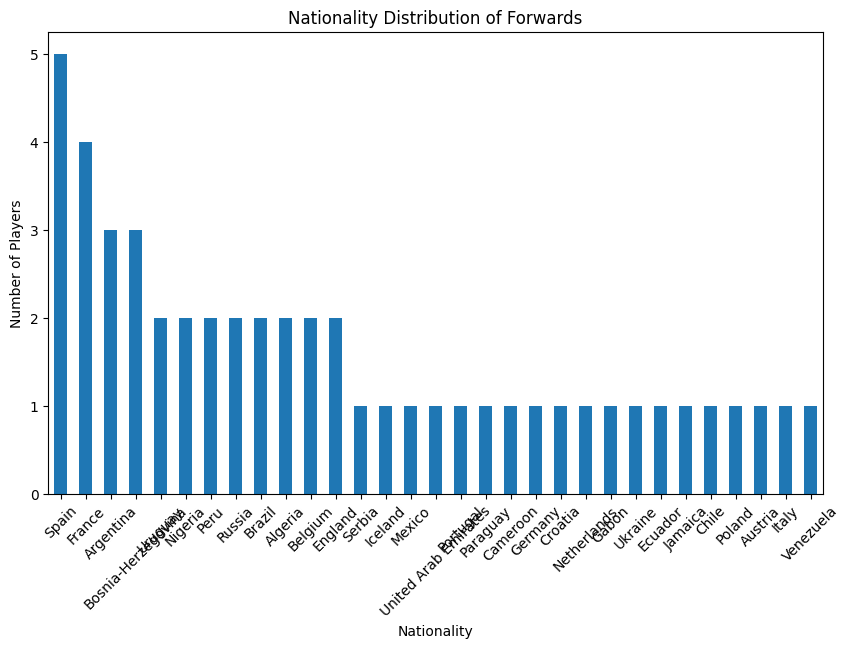

In [9]:
# 공격수 국적별 분포 막대그래프 생성

# 데이터 로드
FW_file_path = '/content/transfermarket_o34_Forward_top50.csv'  # 파일 경로
data = pd.read_csv(FW_file_path)

# 데이터 확인
print(data.head())  # 데이터 샘플 확인

# 국적별 분포 계산
if 'Nation' in data.columns:
    nationality_distribution = data['Nation'].value_counts()
    print(nationality_distribution)  # 확인용 출력

    # 국적별 분포 시각화
    plt.figure(figsize=(10, 6))
    nationality_distribution.plot.bar()
    plt.title('Nationality Distribution of Forwards')  # 그래프 제목
    plt.xlabel('Nationality')  # X축 레이블
    plt.ylabel('Number of Players')  # Y축 레이블
    plt.xticks(rotation=45)  # X축 레이블 회전
    plt.show()
else:
    print("Error: 'Nation' column not found in the dataset.")

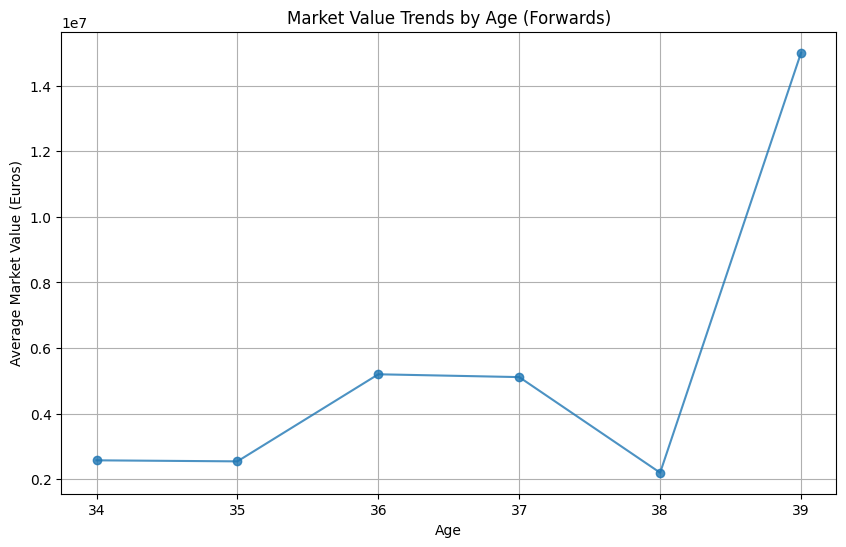

In [10]:
# 연령별 시장 가치 추세 분석 선그래프 생성

# Market Value 데이터를 숫자로 변환하는 함수
def convert_market_value(value):
    value = value.replace('€', '').replace(',', '').strip()  # '€'는 유로(€) 기호
    if 'm' in value:
        return float(value.replace('m', '')) * 1_000_000
    elif 'k' in value:
        return float(value.replace('k', '')) * 1_000
    else:
        return float(value)

# 미드필더 데이터 파일 읽기
FW_file_path = '/content/transfermarket_o34_Forward_top50.csv'  # 파일 경로
data = pd.read_csv(FW_file_path)

# Market Value Numeric 열 생성
data['Market Value Numeric'] = data['Market Value'].apply(convert_market_value)

# 연령별 평균 시장 가치 계산
age_market_value_trends = data.groupby('Age')['Market Value Numeric'].mean()

# 연령별 시장 가치 추세 시각화
import matplotlib.pyplot as plt
import matplotlib as mpl

# 폰트 깨짐 방지를 위해 폰트 설정
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Arial'

plt.figure(figsize=(10, 6))
plt.plot(age_market_value_trends, marker='o', linestyle='-', alpha=0.8)
plt.title('Market Value Trends by Age (Forwards)')
plt.xlabel('Age')
plt.ylabel('Average Market Value (Euros)')
plt.grid(True)
plt.show()